# SALARY PREDICTION. Mentorness

### Project Name: Salary Predictions of Data Professions
Welcome to the Machine Learning Internship, focused on predicting the salaries of data professionals. In
this project, you will dive into the world of regression tasks and gain hands-on experience in data
analysis, feature engineering, and machine learning model development. The goal is to predict the
salaries of data professionals based on a rich dataset.
### Problem Statement:
Salaries in the field of data professions vary widely based on factors such as experience, job role, and
performance. Accurately predicting salaries for data professionals is essential for both job seekers and
employers.
### Mission:
To build a predictive model for salaries of data professionals. 

In [1]:
# importing import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

from scipy.stats import randint, uniform

 
import warnings
warnings.filterwarnings('ignore')


In [2]:
df_org = pd.read_csv("C:/Users/Taiwo/Desktop/Mentorness Machine Learning Internship/Salary Prediction of Data Professions.csv")
df = df_org.copy()
df

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,KATHERINE,ALSDON,F,6-28-2011,01-07-2016,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10
2635,LOUISE,ALTARAS,F,1-14-2014,01-07-2016,Analyst,23.0,45758,IT,17.0,13.0,2.0,0
2636,RENEE,ALVINO,F,1-23-2014,01-07-2016,Analyst,21.0,47315,Web,29.0,1.0,5.0,0
2637,TERI,ANASTASIO,F,3-17-2014,01-07-2016,Analyst,24.0,45172,Web,23.0,7.0,3.0,1


## 1. Exploratory Data Analysis (EDA): 
Dive into the dataset, conduct comprehensive EDA, and unveil valuable insights about data professionals' salaries. EDA will involve data visualization, summary statistics, and identifying patterns in the data.







In [3]:
print(f"Duplicates: {df.duplicated().sum()}")
print("  ")
print(df.isna().sum())

Duplicates: 161
  
FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64


#### Observation:

1. LAST NAME has 2 missing values: I will fill it up with the mode.
2. DOJ has a missing vaue: I will very likely remove this observation.
3. AGE has 3 missing values: I will fill it up with the median.
4. LEAVES USED has 3 missing values: I will fill it up with the median.
5. LEAVES REMAINING has 2 missing values: I will fill it up with the median.
6. RATINGS has 2 missing values: I will fill it up with the median.
7. There are 161 duplicates in the dataset: I will drop the dupicates.


In [4]:
def cleaning_data(df):
    # ropping duplicates
    df = df.drop_duplicates()
    return df
df = cleaning_data(df)

In [5]:
# LAST NAME has 2 missing values: I will fill it up with the mode.
df["LAST NAME"] = df["LAST NAME"].fillna("UNKNOWN")

# DOJ has a missing vaue: I will very likely remove this observation.
df = df.drop(1, axis=0)

# AGE has 3 missing values: I will fill it up with the mean.
df["AGE"] = df["AGE"].fillna(df["AGE"].mean())

# LEAVE USED has 3 missing values: I will fill it up with the median.
df["LEAVES USED"] = df["LEAVES USED"].fillna(df["LEAVES USED"].median())

# LEAVES REMAINING has 2 missing values: I will fill it up with the median.
df["LEAVES REMAINING"] = df["LEAVES REMAINING"].fillna(df["LEAVES REMAINING"].median())

# RATINGS has 2 missing values: I will fill it up with the median.
df["RATINGS"] = df["RATINGS"].fillna(df["RATINGS"].median())

# view data again
print(f"Duplicates: {df.duplicated().sum()}")
print("  ")
print(df.isna().sum())
print("All set!   You are good to go!")
df.head(20)

Duplicates: 0
  
FIRST NAME          0
LAST NAME           0
SEX                 0
DOJ                 0
CURRENT DATE        0
DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
dtype: int64
All set!   You are good to go!


,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.000000,44570,Finance,24.0,6.0,2.0,0
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.000000,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.000000,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,24.727273,43161,Operations,27.0,3.0,3.0,3
5,VICTORIA,UNKNOWN,F,2-19-2013,01-07-2016,Analyst,22.000000,48736,Marketing,20.0,10.0,4.0,0
6,ELLIOT,AGULAR,M,09-02-2013,01-07-2016,Analyst,22.000000,40339,Marketing,19.0,11.0,5.0,0
7,JACQUES,AKMAL,M,12-05-2013,01-07-2016,Analyst,24.727273,40058,Marketing,29.0,1.0,2.0,2
8,KATHY,ALSOP,F,6-29-2014,01-07-2016,Senior Analyst,28.000000,63478,Operations,20.0,10.0,3.0,1
9,LILIAN,APELA,F,11-11-2014,01-07-2016,Analyst,22.000000,43110,Finance,15.0,15.0,3.0,0
10,BELLE,ARDS,F,03-10-2014,01-07-2016,Analyst,24.000000,41590,Marketing,22.0,8.0,4.0,1


In [6]:
# Converting data columns to to_date type
def convert_to_datetime(df):
    df["DOJ"] = pd.to_datetime(df["DOJ"])
    
    return df

df = convert_to_datetime(df)

In [7]:
df['year joined'] = df['DOJ'].dt.year
df['month joined'] = df['DOJ'].dt.month
df['day joined'] = df['DOJ'].dt.day

df['dayofweek joined'] = df['DOJ'].dt.dayofweek
df['quarter joined'] = df['DOJ'].dt.quarter

df.drop("DOJ", axis=1, inplace=True)


               AGE        SALARY  LEAVES USED  LEAVES REMAINING      RATINGS  \
count  2477.000000    2477.00000  2477.000000       2477.000000  2477.000000   
mean     24.727273   58063.66734    22.493339          7.509487     3.481631   
std       3.911011   36788.76835     4.596969          4.595207     1.115758   
min      21.000000   40001.00000    15.000000          0.000000     2.000000   
25%      22.000000   43397.00000    19.000000          4.000000     2.000000   
50%      24.000000   46733.00000    22.000000          8.000000     3.000000   
75%      25.000000   50266.00000    26.000000         11.000000     4.000000   
max      45.000000  388112.00000    30.000000         15.000000     5.000000   

          PAST EXP  year joined  month joined   day joined  dayofweek joined  \
count  2477.000000  2477.000000   2477.000000  2477.000000       2477.000000   
mean      1.557933  2013.337909      6.397658    15.618490          2.939443   
std       2.704700     0.880632      3.

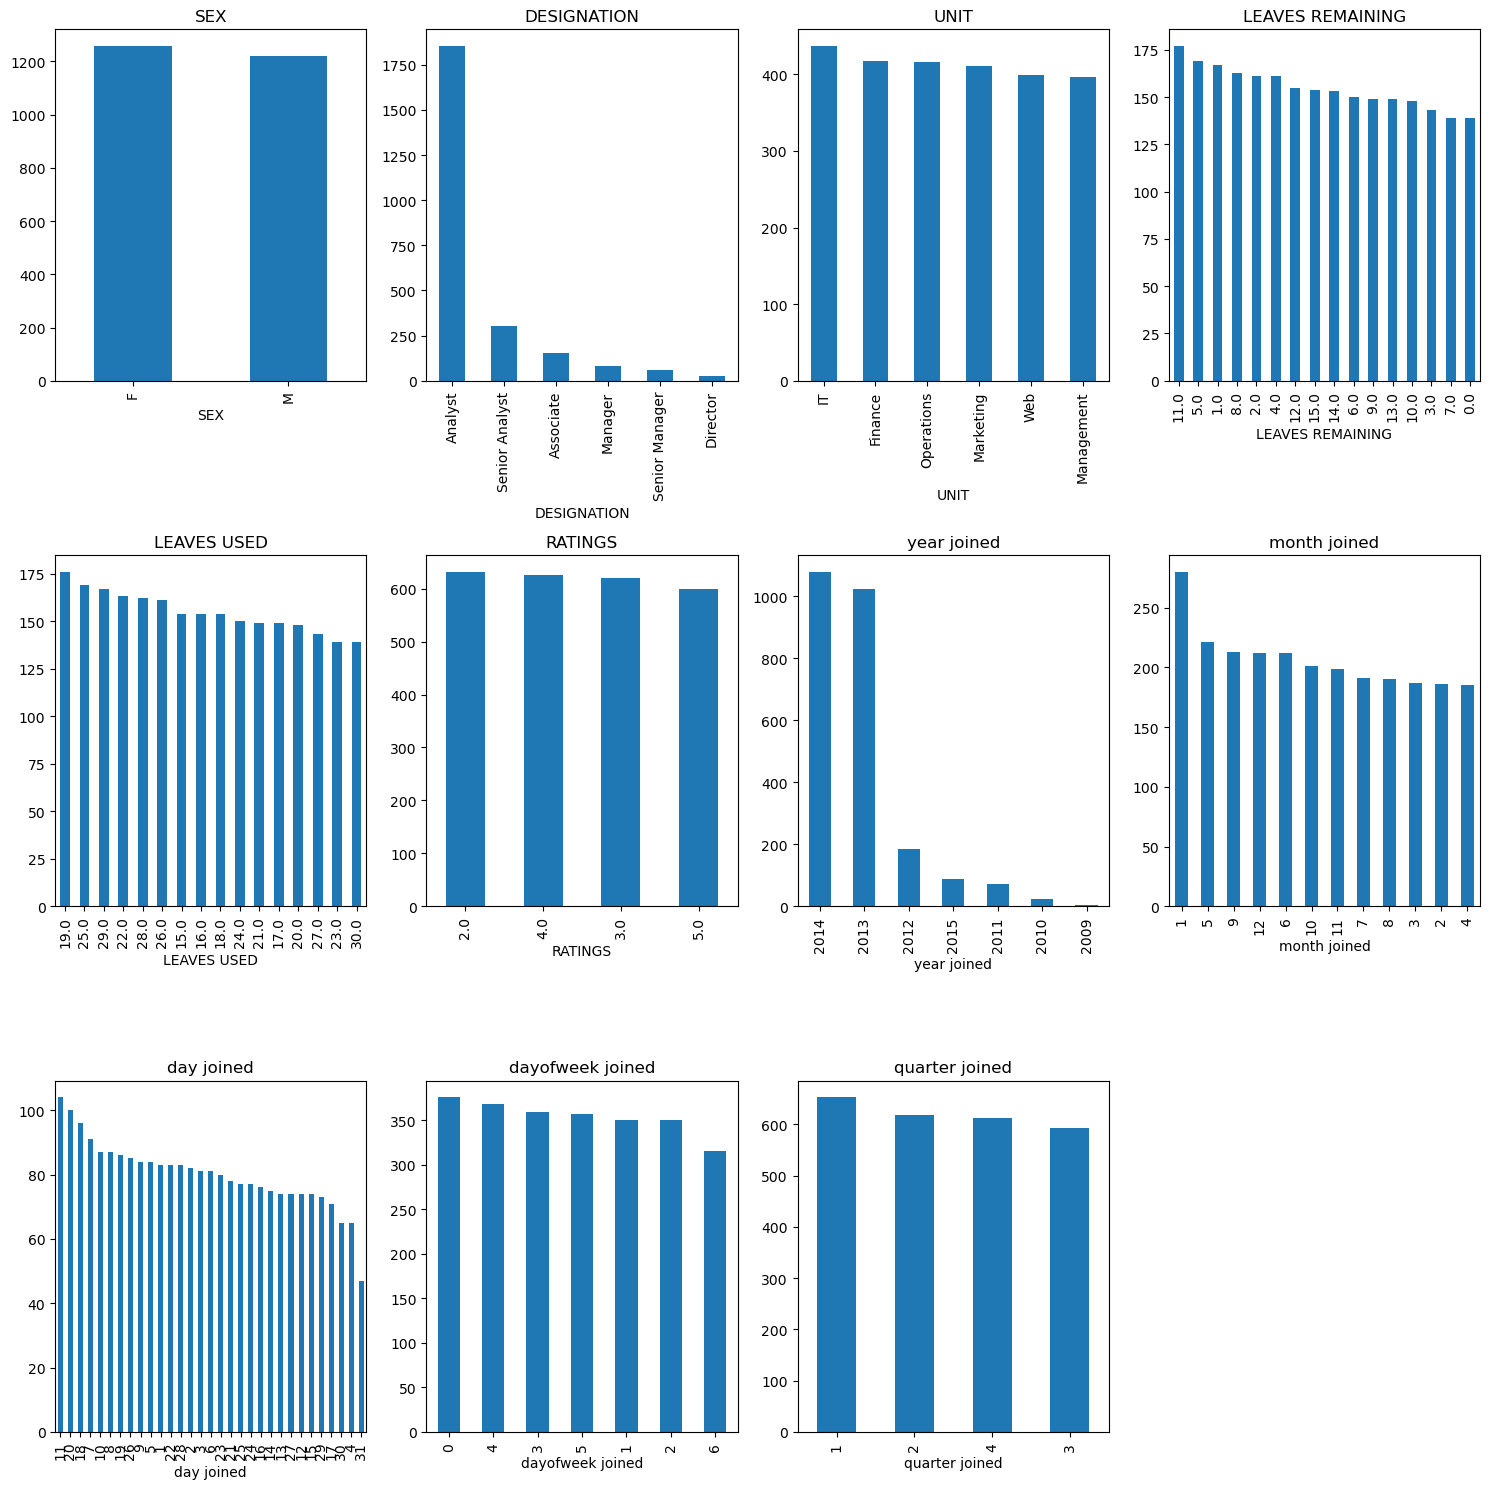

 
Numeric Column Distribution:


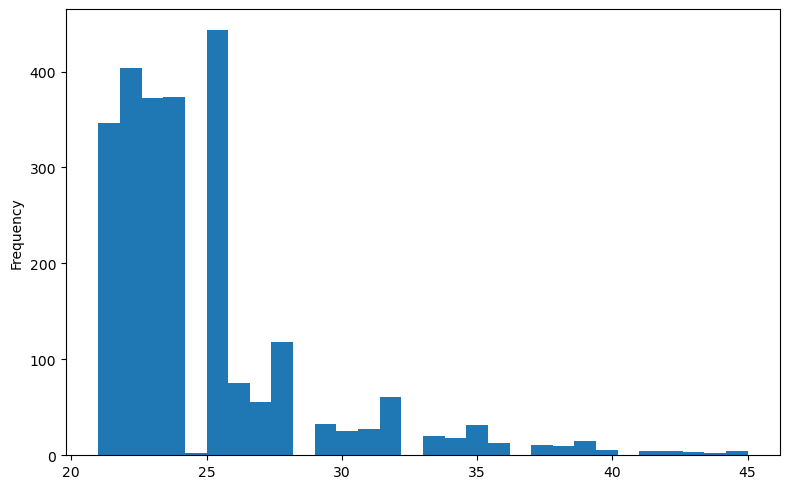

In [8]:
# Describing the data
print(df.describe())
print(" ")

categorical_features = ["SEX", "DESIGNATION", "UNIT","LEAVES REMAINING", "LEAVES USED", "RATINGS",
                       'year joined', 'month joined', 'day joined', 'dayofweek joined', 'quarter joined']
numeric_features = ["AGE"]



# Calculate the number of rows and columns needed for the subplots
num_features = len(categorical_features)
num_cols = min(4, num_features)  # Maximum 4 plots per row
num_rows = -(-num_features // num_cols)  # Ceiling division to ensure enough rows

print("Categorical Column Distribution:")
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))  # Adjust figsize based on num_rows

for ax, col in zip(axs.flat, categorical_features):
    df[col].value_counts().plot(kind="bar", ax=ax, title=col)

# Hide empty subplots
for ax in axs.flat[num_features:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

print(" ")
print("Numeric Column Distribution:")

fig, ax = plt.subplots(figsize=(8, 5))  # Create a new subplot for the numeric column
df["AGE"].plot(kind="hist", bins=30, ax=ax)  # Plot the histogram on the new subplot

plt.tight_layout()
plt.show()


In [9]:
df["AGE"] = df["AGE"].replace(24.727273, 24)
df[df["AGE"] > 24]

,FIRST NAME,LAST NAME,SEX,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,year joined,month joined,day joined,dayofweek joined,quarter joined
4,LEON,ABOULAHOUD,M,01-07-2016,Analyst,24.727273,43161,Operations,27.0,3.0,3.0,3,2014,11,20,3,4
7,JACQUES,AKMAL,M,01-07-2016,Analyst,24.727273,40058,Marketing,29.0,1.0,2.0,2,2013,12,5,3,4
8,KATHY,ALSOP,F,01-07-2016,Senior Analyst,28.000000,63478,Operations,20.0,10.0,3.0,1,2014,6,29,6,2
11,VIRGIL,ACKIES,M,01-07-2016,Senior Manager,36.000000,160613,Finance,22.0,11.0,2.0,9,2010,2,1,0,1
16,ALONZO,ADSIDE,M,01-07-2016,Analyst,25.000000,47636,Finance,27.0,3.0,3.0,2,2013,9,16,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,JEANNA,ARENIVAS,F,01-07-2016,Analyst,25.000000,48541,Operations,24.0,6.0,2.0,2,2013,9,28,5,3
2618,HATTIE,AMICO,F,01-07-2016,Senior Analyst,26.000000,66661,Finance,30.0,0.0,5.0,2,2013,8,12,0,3
2629,RICKIE,AICHELE,M,01-07-2016,Analyst,25.000000,47849,IT,22.0,8.0,2.0,2,2013,9,28,5,3
2631,BILLY,ABDELAZIZ,M,01-07-2016,Analyst,25.000000,43884,Finance,23.0,7.0,4.0,1,2013,6,6,3,2


In [10]:
df["AGE"].value_counts()

AGE
25.000000    443
22.000000    404
24.000000    373
23.000000    372
21.000000    346
28.000000    118
26.000000     75
32.000000     61
27.000000     56
29.000000     33
35.000000     32
31.000000     27
30.000000     25
33.000000     20
34.000000     18
39.000000     15
36.000000     13
37.000000     11
38.000000     10
40.000000      6
42.000000      4
41.000000      4
45.000000      4
43.000000      3
24.727273      2
44.000000      2
Name: count, dtype: int64

## 2. Feature Engineering:
Create new features or transform existing ones that can provide additional insights or improve model performance. Feature engineering might involve deriving features related to experience, job role, and performance.

RELATIONSHIP BETWEEN THE LABEL AND EACH FEATURE:
 


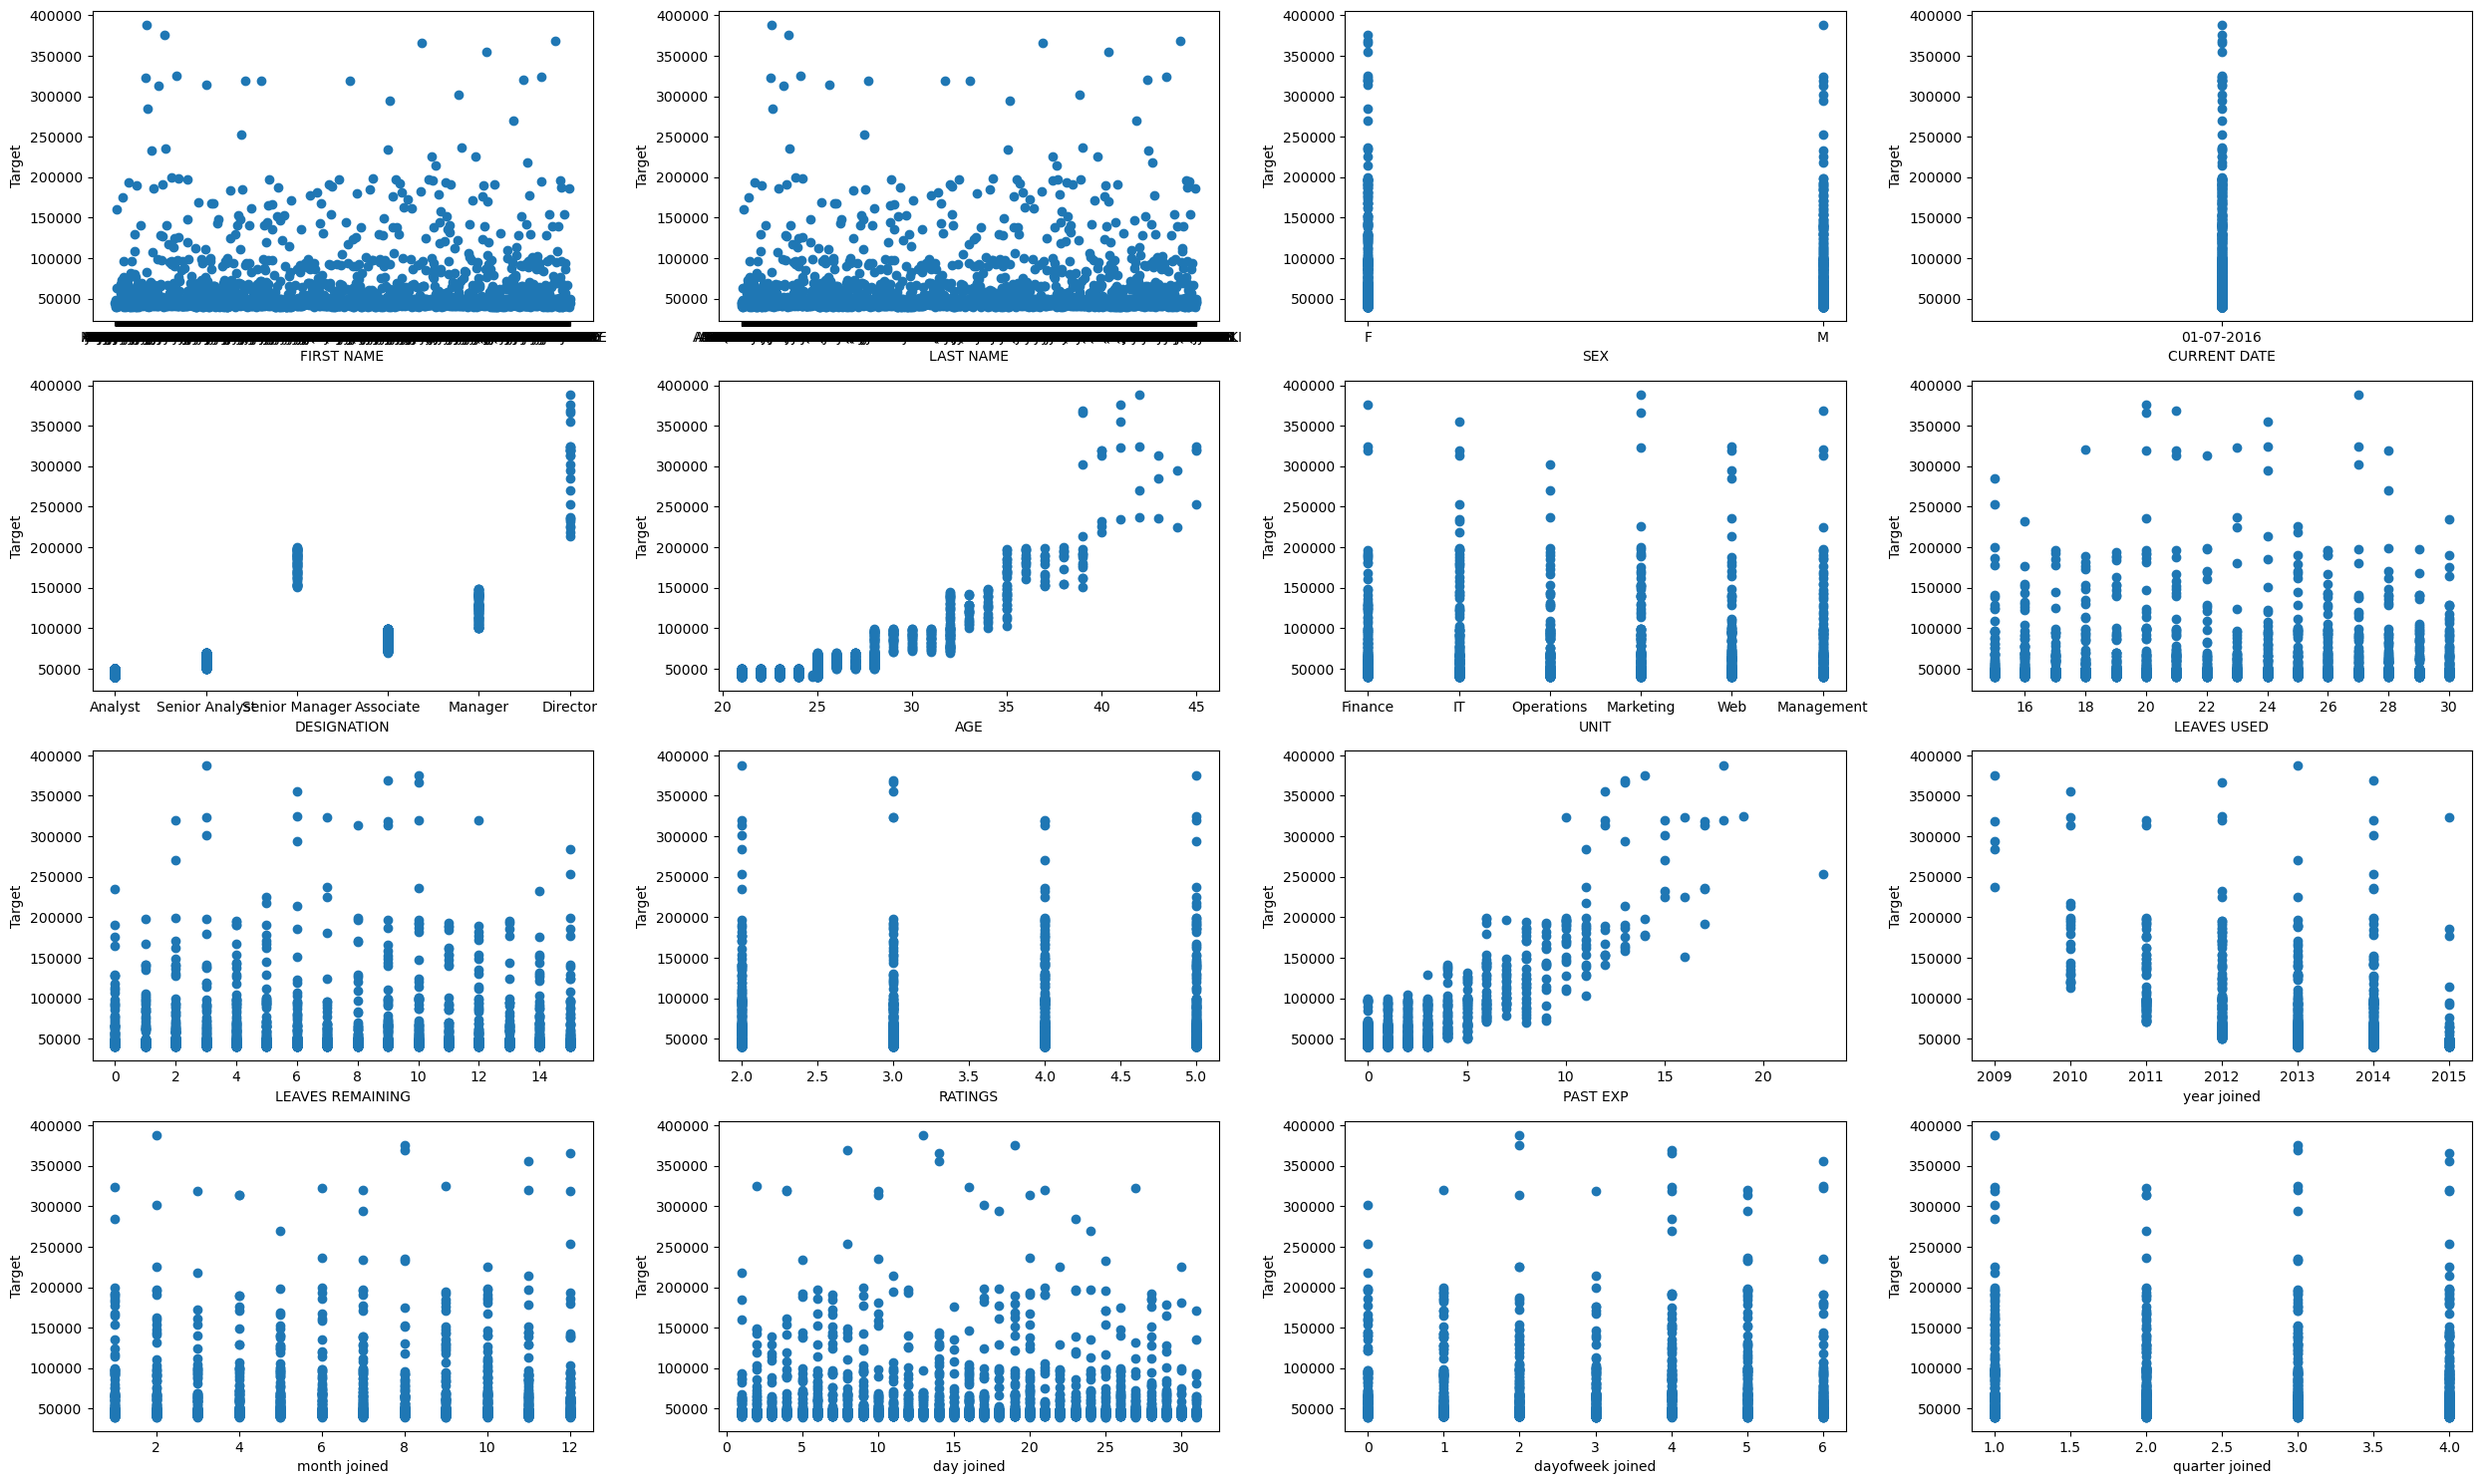

In [11]:
# Diving into features and label
X = df.drop("SALARY", axis=1)
y = df["SALARY"]


# Checking relationship between the label and each feature
print("RELATIONSHIP BETWEEN THE LABEL AND EACH FEATURE:")
print(" ")



fig, axs = plt.subplots(4, 4, figsize=(25, 15))  # Adjusting figsize to accommodate all plots
axs = axs.flatten()  # Flattening the array of axes for easy iteration

for i, col in enumerate(X.columns):
    axs[i].scatter(x=X[col], y=y)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Target')  # Assuming 'Target' is what y represents

# Hide any unused subplots if X.columns has fewer than 16 columns
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

In [12]:
X = df.drop(["FIRST NAME", "LAST NAME", "CURRENT DATE", "SALARY"], axis=1)
y = df["SALARY"]


In [13]:
def convert_to_numeric(df, categorical_features):
    # Initialize a dictionary to store mapping values
    mapping_values = {}

    # Initialize the LabelEncoder
    le = LabelEncoder()

    for feature in categorical_features:
        df[feature] = le.fit_transform(df[feature])
        mapping_values[feature] = dict(zip(le.classes_, le.transform(le.classes_)))
    
    return df, mapping_values
    

X, mapping_values = convert_to_numeric(X, categorical_features)

# Print the mapping values for each encoded column
for feature, mapping in mapping_values.items():
    print(f"{feature} Mapping:")
    print(mapping)
    print()



X.head()

SEX Mapping:
{'F': 0, 'M': 1}

DESIGNATION Mapping:
{'Analyst': 0, 'Associate': 1, 'Director': 2, 'Manager': 3, 'Senior Analyst': 4, 'Senior Manager': 5}

UNIT Mapping:
{'Finance': 0, 'IT': 1, 'Management': 2, 'Marketing': 3, 'Operations': 4, 'Web': 5}

LEAVES REMAINING Mapping:
{0.0: 0, 1.0: 1, 2.0: 2, 3.0: 3, 4.0: 4, 5.0: 5, 6.0: 6, 7.0: 7, 8.0: 8, 9.0: 9, 10.0: 10, 11.0: 11, 12.0: 12, 13.0: 13, 14.0: 14, 15.0: 15}

LEAVES USED Mapping:
{15.0: 0, 16.0: 1, 17.0: 2, 18.0: 3, 19.0: 4, 20.0: 5, 21.0: 6, 22.0: 7, 23.0: 8, 24.0: 9, 25.0: 10, 26.0: 11, 27.0: 12, 28.0: 13, 29.0: 14, 30.0: 15}

RATINGS Mapping:
{2.0: 0, 3.0: 1, 4.0: 2, 5.0: 3}

year joined Mapping:
{2009: 0, 2010: 1, 2011: 2, 2012: 3, 2013: 4, 2014: 5, 2015: 6}

month joined Mapping:
{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11}

day joined Mapping:
{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 2

,SEX,DESIGNATION,AGE,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,year joined,month joined,day joined,dayofweek joined,quarter joined
0,0,0,21.000000,0,9,6,0,0,5,4,17,6,1
2,0,0,21.000000,0,8,7,1,0,5,6,27,0,2
3,0,0,22.000000,1,7,8,1,0,4,3,2,2,1
4,1,0,24.727273,4,12,3,1,3,5,10,19,3,3
5,0,0,22.000000,3,5,10,2,0,4,1,18,1,0


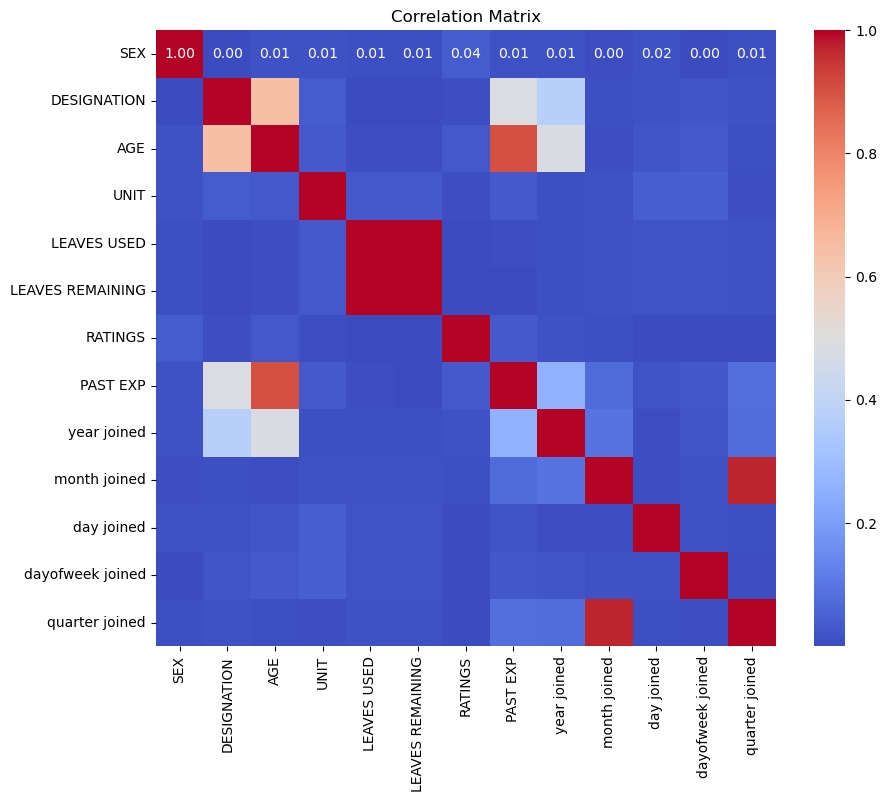

In [14]:
# Checking for correlation and multicolinearity
# Heatmap of the correlation matrix
corr = X.corr().abs()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [15]:
# selecting upper Triangle of Correlation matrix

def drop_features(X):
    corr = X.corr().abs()
    
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    
    # Find features with correlation greater than the threshold
    threshold = 0.9
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    # Drop feature with high correlation
    X = X.drop(columns=to_drop)
    return X

X = drop_features(X)
X.head(20)

,SEX,DESIGNATION,AGE,UNIT,LEAVES USED,RATINGS,year joined,month joined,day joined,dayofweek joined
0,0,0,21.000000,0,9,0,5,4,17,6
2,0,0,21.000000,0,8,1,5,6,27,0
3,0,0,22.000000,1,7,1,4,3,2,2
4,1,0,24.727273,4,12,1,5,10,19,3
5,0,0,22.000000,3,5,2,4,1,18,1
6,1,0,22.000000,3,4,3,4,8,1,0
7,1,0,24.727273,3,14,0,4,11,4,3
8,0,4,28.000000,4,5,1,5,5,28,6
9,0,0,22.000000,0,0,1,5,10,10,1
10,0,0,24.000000,3,7,2,5,2,9,0


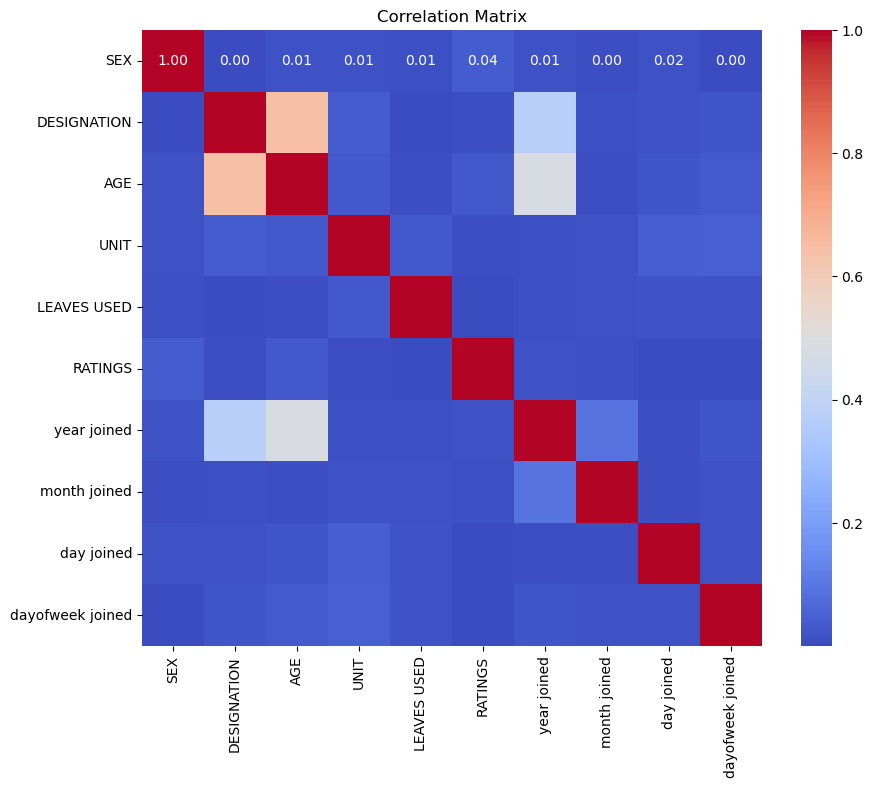

,SEX,DESIGNATION,AGE,UNIT,LEAVES USED,RATINGS,year joined,month joined,day joined,dayofweek joined
SEX,1.000000,0.001116,0.012410,0.012439,0.010827,0.035549,0.012922,0.004742,0.015645,0.002513
DESIGNATION,0.001116,1.000000,0.644440,0.036505,0.002329,0.007210,0.373252,0.011646,0.014612,0.022691
AGE,0.012410,0.644440,1.000000,0.027698,0.005391,0.031064,0.480549,0.004548,0.022608,0.034577
UNIT,0.012439,0.036505,0.027698,1.000000,0.029394,0.004658,0.008053,0.012106,0.040134,0.045751
LEAVES USED,0.010827,0.002329,0.005391,0.029394,1.000000,0.002397,0.011765,0.014593,0.019607,0.018046
RATINGS,0.035549,0.007210,0.031064,0.004658,0.002397,1.000000,0.011972,0.008646,0.000089,0.003143
year joined,0.012922,0.373252,0.480549,0.008053,0.011765,0.011972,1.000000,0.090048,0.006690,0.023392
month joined,0.004742,0.011646,0.004548,0.012106,0.014593,0.008646,0.090048,1.000000,0.006793,0.012984
day joined,0.015645,0.014612,0.022608,0.040134,0.019607,0.000089,0.006690,0.006793,1.000000,0.014182
dayofweek joined,0.002513,0.022691,0.034577,0.045751,0.018046,0.003143,0.023392,0.012984,0.014182,1.000000


In [16]:
# Removing Multi Colinear features
# Heatmap of the correlation matrix
corr = X.corr().abs()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
corr

## 3. Data Preprocessing: 
Prepare the data for model training. This includes handling missing values,
encoding categorical variables, and scaling or normalizing features as needed.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=.2,
                                                   random_state=42)


### All functions:



In [18]:
def checking_result_fitting(result, threshold):
    """Take in a table from the function ~regression_model_performance_metrics()
    and a given threshold(int)~
    Returns: {model} 'is overfitting', or 'is performing well', or 'is underfitting' as the case is
    """

    for i in result.index:
        train_error = (result.loc[i][0])
        test_error = (result.loc[i][4])
        if train_error < test_error:
            if (test_error - train_error) > threshold:
                print(f"{i}: is overfitting.")
                print(" ")
            else:
                print(f"{i}: is performing well.")
                print(" ")
        else:
            print(f"{i}: is underfitting.")


def rmse(model):
    """Takes in a Model
    Result: Root Mean Squared Error (RMSE)"""
    return np.sqrt(mean_squared_error(y_test, y_preds))

def rmsle(model):
    """Takes in a Model
    Result: Root Mean Squared Log Error (RMSLE)"""
    
    return np.sqrt(mean_squared_log_error(y_test, y_preds))


def show_scores(model):
    """Takes in Model.
    Returns: Dictionary of 
    1. Training MAE
    2. Test MAE
    3. Training MSE
    4. Testing MSE
    5. Training RMSE
    6. Testing RMSE
    7. Training R2
    8. Testing R2
    """
    train_preds = model.predict(X_train)
    test_preds  = model.predict(X_test)

    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
             "Test MAE"     : mean_absolute_error(y_test, test_preds),
              "Training MSE": mean_squared_error(y_train, train_preds),
              "Testing MSE" : mean_squared_error(y_test, test_preds),
             "Training RMSE": rmsle(y_train, train_preds),
             "Testing RMSE" : rmsle(y_test, test_preds),
             "Training R2"  : r2_score(y_train, train_preds),
             "Testing R2"   : r2_score(y_test, test_preds)}

    return scores


def cross_val_score_reg_model_fit(new_models, cv):

    """Takes in a dictionary of model and number of 'cv'
    Returns: a data frame of regressor, CV R-squared, CV MAE, CV MSE."""
    
    cv_result = []
    cv_models = {}
    
    for name, reg in new_models.items():
        print ('Fitting model...'.format(name)) 
    
        cv_r2  = np.mean(cross_val_score(reg, X, y, cv=cv, scoring="r2"))
        cv_mae = np.mean(cross_val_score(reg, X, y, cv=cv, scoring="neg_mean_absolute_error"))
        cv_mse = np.mean(cross_val_score(reg, X, y, cv=cv, scoring="neg_mean_squared_error"))
    
        print("done")
        cv_models[name] = reg
    
        cv_result.append([name, cv_r2, cv_mae, cv_mse])
    
    cv_result = pd.DataFrame(cv_result, columns=["Regressor","CV R-Squared", "CV MAE", "CV MSE"])
    cv_result.set_index("Regressor", inplace=True)
    print("All done!")
        
    return cv_result

def evaluate(model, test_features, test_labels):
    
    predictions = model.predict(test_features)
    errors      = abs(predictions - test_labels)
    mape        = 100*np.mean(errors/test_labels)
    accuracy    = 100 - mape

    print("Model Perfromance")
    print("Average Error: {:0.4f} degress.".format(np.mean(errors)))
    print("Accuracy = {:0.2f}%.".format(accuracy))

    return accuracy

def best_param(base_model, random_search_model):
    "Takes a base model and random search model, compare them and print metrics"
    
    base_model.fit(X_train, y_train)
    base_accuracy = evaluate(base_model, X_test, y_test)

    random_search_model = random_search_model.fit(X_train, y_train)
    best_random     = random_search_model.best_estimator_
    random_accuracy = evaluate(best_random, X_test, y_test)
    
    print("Improvement of {:0.2f}%.".format(100*(random_accuracy - base_accuracy) / base_accuracy))
    print(random_search_model.best_params_)


def regression_model_performance_metrics(dict_models):
    """ Takes is a dictionary of models:
    Rrturns: A data frame Metrics of each regresorr
    """

    models  = {}
    result = []
    
    for name, reg in dict_models.items():
        print ('Fitting model...'.format(name))
    
        run_time = %timeit -q -o reg.fit(X_train, y_train)
    
        print("Predicting...")
        train_pred = reg.predict(X_train)
        test_pred = reg.predict(X_test)
    
        print("Scoring...")
        mae_training  = mean_absolute_error(y_train, train_pred)
        mse_training  = mean_squared_error(y_train, train_pred)
        rmse_training = np.sqrt(mean_squared_error(y_train, train_pred))
        r2_training   = r2_score(y_train, train_pred)
        
        mae_test  = mean_absolute_error(y_test, test_pred)
        mse_test  = mean_squared_error(y_test, test_pred)
        rmse_test = np.sqrt(mean_squared_error(y_test, test_pred))
        r2_test   = r2_score(y_test, test_pred)
    
        # Saving results
        models[name] = reg
    
        result.append([name, mae_training, mse_training, rmse_training, r2_training, mae_test, mse_test, rmse_test,  r2_test, run_time.best])
    
    result = pd.DataFrame(result, columns=["Regressor", " Train MAE", "Train MSE", "Train RMSE", "Train R2",
                                           " Test MAE", "Test MSE", "Test RMSE", "Test R2", "Train Time"])
    result.set_index("Regressor", inplace=True)
    print("All done!")

    return result

## 4. Machine Learning Model Development: 
Train various machine learning regression models to predict
salaries. Experiment with different algorithms such as linear regression, decision trees, random forests,
and gradient boosting to find the best-performing model.

In [19]:
# Building multiple regressors
np.random.seed(42)

models = {
         "Decision_tree"    : DecisionTreeRegressor(),
         "Random_forest"    : RandomForestRegressor(),
         "Ada_boost"        : AdaBoostRegressor(DecisionTreeRegressor()),
         "Bagging"          : BaggingRegressor(DecisionTreeRegressor()),
         "Gradient_boost"   : GradientBoostingRegressor(),
}


all_reg_model = regression_model_performance_metrics(models)
all_reg_model

Fitting model...
Predicting...
Scoring...
Fitting model...
Predicting...
Scoring...
Fitting model...
Predicting...
Scoring...
Fitting model...
Predicting...
Scoring...
Fitting model...
Predicting...
Scoring...
All done!


,Train MAE,Train MSE,Train RMSE,Train R2,Test MAE,Test MSE,Test RMSE,Test R2,Train Time
Regressor,,,,,,,,,
Decision_tree,1.519435,2.286749e+03,47.819966,0.999998,5152.022177,9.926514e+07,9963.189126,0.893725,0.024920
Random_forest,1681.071982,1.115315e+07,3339.633718,0.992333,3812.598068,4.130213e+07,6426.673084,0.955781,1.438584
Ada_boost,99.184755,9.522410e+04,308.584024,0.999935,4050.532258,5.351228e+07,7315.208782,0.942709,0.678757
Bagging,1804.437052,1.314784e+07,3625.995051,0.990962,3939.708266,4.956635e+07,7040.337010,0.946934,0.148101
Gradient_boost,3603.901417,2.534993e+07,5034.871799,0.982574,3969.907198,7.592531e+07,8713.513322,0.918713,0.295133


In [20]:
#Checking for overfitting
threshold = 100
checking_result_fitting(all_reg_model, threshold=threshold)

Decision_tree: is overfitting.
 
Random_forest: is overfitting.
 
Ada_boost: is overfitting.
 
Bagging: is overfitting.
 
Gradient_boost: is overfitting.
 


#### The following performed quite well and I will tune thier hyperparameters to see the best performing one.
Also, the model performs better without scalling the features!
1. Decision_tree
2. Random_forest
3. Ada_boost
4. Bagging
5. Gradient_boost 	


In [21]:
np.random.seed(42)
# Cross validation score for all models
         
cross_val_score_reg_model_fit(models, cv=5)

Fitting model...
done
Fitting model...
done
Fitting model...
done
Fitting model...
done
Fitting model...
done
All done!


,CV R-Squared,CV MAE,CV MSE
Regressor,,,
Decision_tree,0.893389,-5708.452097,-1.470969e+08
Random_forest,0.943948,-4454.371749,-7.571669e+07
Ada_boost,0.935440,-4786.439548,-9.411551e+07
Bagging,0.940500,-4605.520057,-8.523196e+07
Gradient_boost,0.943891,-4434.983520,-7.641566e+07


### I will be proceeding with tuning their hyperparameters.

## Tuning hyperparameter for all models with a randomized search cross validation to see best performing model:

In [22]:

# Using randomized search cross validation for the Random Forest Regessor
np.random.seed(42)

random_grid = {
    "n_estimators": randint(10, 200),
    "max_features" : [None, "sqrt", "log2"],
    "max_depth"    : randint(1, 20),
    "min_samples_split": randint(2, 20),
    "min_samples_leaf" : randint(1, 20),
    "max_leaf_nodes"   : randint(2, 50),
    "min_impurity_decrease": [0.1,0.2,0.3,0.4,0.5]
}



base_model_rf    = RandomForestRegressor()

rf_random = RandomizedSearchCV(base_model_rf,param_distributions= random_grid, cv=5, verbose=2, n_jobs=1,error_score='raise', n_iter=100)

# Evaluating the Random Search best param with the Random Forest Regressor


best_param(base_model_rf, rf_random)



Model Perfromance
Average Error: 3734.4863 degress.
Accuracy = 93.75%.
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=18, max_features=sqrt, max_leaf_nodes=45, min_impurity_decrease=0.2, min_samples_leaf=10, min_samples_split=5, n_estimators=23; total time=   0.1s
[CV] END max_depth=18, max_features=sqrt, max_leaf_nodes=45, min_impurity_decrease=0.2, min_samples_leaf=10, min_samples_split=5, n_estimators=23; total time=   0.1s
[CV] END max_depth=18, max_features=sqrt, max_leaf_nodes=45, min_impurity_decrease=0.2, min_samples_leaf=10, min_samples_split=5, n_estimators=23; total time=   0.1s
[CV] END max_depth=18, max_features=sqrt, max_leaf_nodes=45, min_impurity_decrease=0.2, min_samples_leaf=10, min_samples_split=5, n_estimators=23; total time=   0.0s
[CV] END max_depth=18, max_features=sqrt, max_leaf_nodes=45, min_impurity_decrease=0.2, min_samples_leaf=10, min_samples_split=5, n_estimators=23; total time=   0.0s
[CV] END max_depth=16, max_features=

In [23]:
# Decision Tree

np.random.seed(42)

d_tree = DecisionTreeRegressor()
base_model_ada    = AdaBoostRegressor(estimator=d_tree)
                                          

               
ada_grid = {
    "n_estimators": randint(10, 200),
    "learning_rate": uniform(0.01, 1.0),
    "estimator__max_depth" : randint(1, 20),
    "estimator__min_samples_split" : randint(2,20),
    "estimator__min_samples_leaf" : randint(1,20)
}


ada_random = RandomizedSearchCV(base_model_ada, param_distributions=ada_grid, cv=5, verbose=2, n_jobs=1,error_score='raise', n_iter=100)
# Evaluating the Random Search best param with the Random Forest Regressor


best_param(base_model_ada, ada_random)

Model Perfromance
Average Error: 4132.8992 degress.
Accuracy = 93.18%.
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END estimator__max_depth=16, estimator__min_samples_leaf=4, estimator__min_samples_split=16, learning_rate=0.10669628449348854, n_estimators=152; total time=   1.8s
[CV] END estimator__max_depth=16, estimator__min_samples_leaf=4, estimator__min_samples_split=16, learning_rate=0.10669628449348854, n_estimators=152; total time=   2.6s
[CV] END estimator__max_depth=16, estimator__min_samples_leaf=4, estimator__min_samples_split=16, learning_rate=0.10669628449348854, n_estimators=152; total time=   1.7s
[CV] END estimator__max_depth=16, estimator__min_samples_leaf=4, estimator__min_samples_split=16, learning_rate=0.10669628449348854, n_estimators=152; total time=   2.1s
[CV] END estimator__max_depth=16, estimator__min_samples_leaf=4, estimator__min_samples_split=16, learning_rate=0.10669628449348854, n_estimators=152; total time=   2.2s
[CV] END estimat

In [24]:
# Bagging boosting hyperparamete tuning
np.random.seed(42)

base_model_bagging = BaggingRegressor(estimator=d_tree)



               
bagging_grid = {
    "n_estimators": [100, 200, 300],
    "max_samples": [0.5, 0.6, 0.7, 0.8],
    "max_features": [0.5, 0.6, 0.7, 0.8],
    "bootstrap": [True],
    "estimator__max_depth": [10, 15, 20],
    "estimator__min_samples_split": [2,5,10],
    "estimator__min_samples_leaf": [1,2,4]
    
}

bagging_random = RandomizedSearchCV(base_model_bagging,param_distributions=bagging_grid, cv=5, verbose=2, n_jobs=1,error_score='raise', n_iter=50)


# Evaluating the Random Search best param with the Bagging Regressor


best_param(base_model_bagging, bagging_random)

Model Perfromance
Average Error: 3963.7176 degress.
Accuracy = 93.53%.
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END bootstrap=True, estimator__max_depth=15, estimator__min_samples_leaf=1, estimator__min_samples_split=2, max_features=0.8, max_samples=0.8, n_estimators=300; total time=   3.9s
[CV] END bootstrap=True, estimator__max_depth=15, estimator__min_samples_leaf=1, estimator__min_samples_split=2, max_features=0.8, max_samples=0.8, n_estimators=300; total time=   3.1s
[CV] END bootstrap=True, estimator__max_depth=15, estimator__min_samples_leaf=1, estimator__min_samples_split=2, max_features=0.8, max_samples=0.8, n_estimators=300; total time=   3.5s
[CV] END bootstrap=True, estimator__max_depth=15, estimator__min_samples_leaf=1, estimator__min_samples_split=2, max_features=0.8, max_samples=0.8, n_estimators=300; total time=   3.7s
[CV] END bootstrap=True, estimator__max_depth=15, estimator__min_samples_leaf=1, estimator__min_samples_split=2, max_features=0

In [25]:
# Decision Tree hyperparamet tuning
np.random.seed(42)

tree_grid = {
    "criterion": ["poisson", "friedman_mse", "absolute_error"],
    "splitter": ["best", "random"],
    "max_depth": randint(1, 20),
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 20),
    "max_features": [None, "sqrt", "log2"],
    "max_leaf_nodes" : randint(2, 50),
    "min_impurity_decrease" : [0.1,0.2,0.3,0.4,0.5]
}

base_model_tree    = DecisionTreeRegressor()

tree_random = RandomizedSearchCV(base_model_tree,param_distributions= tree_grid, cv=5, verbose=2, n_jobs=1,error_score='raise', n_iter=100)

# Evaluating the Random Search best param with the Decision Tree Regressor


best_param(base_model_tree, tree_random)

Model Perfromance
Average Error: 5111.7762 degress.
Accuracy = 91.59%.
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END criterion=poisson, max_depth=15, max_features=log2, max_leaf_nodes=9, min_impurity_decrease=0.5, min_samples_leaf=7, min_samples_split=12, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=15, max_features=log2, max_leaf_nodes=9, min_impurity_decrease=0.5, min_samples_leaf=7, min_samples_split=12, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=15, max_features=log2, max_leaf_nodes=9, min_impurity_decrease=0.5, min_samples_leaf=7, min_samples_split=12, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=15, max_features=log2, max_leaf_nodes=9, min_impurity_decrease=0.5, min_samples_leaf=7, min_samples_split=12, splitter=best; total time=   0.0s
[CV] END criterion=poisson, max_depth=15, max_features=log2, max_leaf_nodes=9, min_impurity_decrease=0.5, min_samples_leaf=7, min_samples_

In [26]:
# Using randomized search cross validation for the Gradient Boost Regressor

np.random.seed(42)

gbr = GradientBoostingRegressor()

gradient_grid = {"n_estimators"   : randint(10, 200),
                "learning_rate"   : uniform(0.01, 1.0),
                "max_depth"       : randint(1, 20),
                "min_samples_split" : randint(2, 20),
                "min_samples_leaf"  : randint(1, 20),
                "max_features"      : [None, "sqrt", "log2"],
                "subsample"         : [0.5, 0.75, 1.0]}

gs_random = RandomizedSearchCV(estimator=gbr,
                              param_distributions=gradient_grid,
                              n_iter=100,
                              cv=5,
                              verbose=2,
                              n_jobs=1,
                              error_score='raise')


best_param(gbr, gs_random)

Model Perfromance
Average Error: 3970.7914 degress.
Accuracy = 93.69%.
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END learning_rate=0.9795846277645586, max_depth=12, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=23, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.9795846277645586, max_depth=12, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=23, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.9795846277645586, max_depth=12, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=23, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.9795846277645586, max_depth=12, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=23, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.9795846277645586, max_depth=12, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=23, subsample=1.0; total time=   0.0s
[CV] END learning_rat

In [27]:
# Evaluating Random Forest Regressor's new parameters
np.random.seed(42)

rf_improved    = RandomForestRegressor(max_depth=7, max_features=None, max_leaf_nodes=9, min_impurity_decrease=0.4, 
                                       min_samples_leaf=2, min_samples_split=2, n_estimators=57)
ada_improved    = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5, min_samples_leaf=13,min_samples_split=11), 
                                    learning_rate=0.029724472632554504, n_estimators=72)
bagging_improved = BaggingRegressor(DecisionTreeRegressor(min_samples_split=5, min_samples_leaf=4, max_depth=15), 
                                    n_estimators=100,  max_samples=0.8, max_features=0.8, bootstrap=True)
d_tree_improved = DecisionTreeRegressor(criterion='poisson', max_depth=4, max_features=None, max_leaf_nodes=22, min_impurity_decrease=0.5, 
                                        min_samples_leaf=4, min_samples_split=11, splitter='best')


best_params_models = {"Random_forest" : rf_improved,
                      "Ada Boosst" : ada_improved,
                      "Bagging Regressor" : bagging_improved,
                      "Decision Tree" : base_model_tree,
                      "Gradient_boost" : gbr}


# Checking for best performing model
tuned_model_metrics = regression_model_performance_metrics(best_params_models)
tuned_model_metrics

Fitting model...
Predicting...
Scoring...
Fitting model...
Predicting...
Scoring...
Fitting model...
Predicting...
Scoring...
Fitting model...
Predicting...
Scoring...
Fitting model...
Predicting...
Scoring...
All done!


,Train MAE,Train MSE,Train RMSE,Train R2,Test MAE,Test MSE,Test RMSE,Test R2,Train Time
Regressor,,,,,,,,,
Random_forest,4154.699709,4.904271e+07,7003.049804,0.966287,3716.653714,4.063589e+07,6374.628630,0.956495,0.216216
Ada Boosst,3831.144556,3.413631e+07,5842.628971,0.976534,3848.007156,4.653898e+07,6821.948277,0.950175,0.574043
Bagging Regressor,3337.732930,4.428626e+07,6654.792363,0.969557,3750.177980,3.884486e+07,6232.564727,0.958412,0.902464
Decision Tree,1.519435,2.286749e+03,47.819966,0.999998,5112.193548,9.927530e+07,9963.699011,0.893714,0.019246
Gradient_boost,3603.901417,2.534993e+07,5034.871799,0.982574,3972.698573,7.545495e+07,8686.480619,0.919217,0.318620


In [28]:
# Testing for overfitting models

threshold = 400
checking_result_fitting(tuned_model_metrics, threshold=threshold)

Random_forest: is underfitting.
Ada Boosst: is performing well.
 
Bagging Regressor: is overfitting.
 
Decision Tree: is overfitting.
 
Gradient_boost: is performing well.
 


In [29]:
# Grid Search CV for Gradient Boosting Regressor

gbr_2 = GradientBoostingRegressor(random_state=42)

grad_grid = {
    "n_estimators" : [50,100,200],
    "learning_rate": [0.01,0.05,0.1],
    "max_depth" : [3,4,5],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4],
    "max_features": [None, "log2", "sqrt"]
}

grid_search = GridSearchCV(
    estimator=gbr_2,
    param_grid=grad_grid,
    scoring="neg_mean_absolute_error",
    cv=5,
    n_jobs=1,
    verbose=2
)


grid_search.fit(X_train, y_train)

print(f"Best parameters found: {grid_search.best_params_}")

best_model = grid_search.best_estimator_
print(" ")
y_train_pred = best_model.predict(X_train)
print(f"Training Mean absolute error: {mean_absolute_error(y_train, y_train_pred)}")
print(" ")
y_test_pred = best_model.predict(X_test)
print(f"Testing Mean absolute error: {mean_absolute_error(y_test, y_test_pred)}")

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2, n_est

## 5. Model Evaluation:
Assess the performance of your models using appropriate evaluation metrics like
Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Rsquared
(R2) score. Identify the model that provides the most accurate salary predictions.

 #### I will be using the gradient boosting regressor best parameters

In [30]:
np.random.seed(42)
model = GradientBoostingRegressor(learning_rate=0.05, max_depth=4, max_features=None, min_samples_leaf=1, 
                                  min_samples_split=10, n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print(f"Accuracy: {round(model.score(X_test, y_test) * 100, 2)}%")

Accuracy: 95.14%


## 6. ML Pipelines and Model Deployment:
Create ML Pipelines to streamline the end-to-end machine
learning process, from data preprocessing to model training. Additionally, deploy a model that can
generate predictions for unseen data. Consider using frameworks like Flask or FastAPI for deployment.

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn import set_config
set_config(display="diagram")

# Load the dataset
df_org = pd.read_csv("C:/Users/Taiwo/Desktop/Mentorness Machine Learning Internship/Salary Prediction of Data Professions.csv")
df = df_org.copy()

# Define custom functions
def cleaning_data(df):
    df = df.drop_duplicates()
    return df


def preprocess_data(df):
    df["AGE"] = df["AGE"].fillna(df["AGE"].mean())
    df["LEAVES USED"] = df["LEAVES USED"].fillna(df["LEAVES USED"].median())
    df["LEAVES REMAINING"] = df["LEAVES REMAINING"].fillna(df["LEAVES REMAINING"].median())
    df["RATINGS"] = df["RATINGS"].fillna(df["RATINGS"].median())
    return df

def convert_to_datetime(df):
    df['DOJ'] = pd.to_datetime(df['DOJ'])
    df['year joined'] = df['DOJ'].dt.year
    df['month joined'] = df['DOJ'].dt.month
    df['day joined'] = df['DOJ'].dt.day
    df['dayofweek joined'] = df['DOJ'].dt.dayofweek
    df['quarter joined'] = df['DOJ'].dt.quarter
    df.drop("DOJ", axis=1, inplace=True)
    return df

# Apply cleaning and preprocessing functions
df = cleaning_data(df)
df = preprocess_data(df)
df = convert_to_datetime(df)

# Define the feature columns and label column
feature_cols = ["SEX", "DESIGNATION", "AGE", "UNIT", "LEAVES USED", "RATINGS",
                'year joined', 'month joined', 'day joined', 'dayofweek joined']
label_col = 'SALARY'

# Split the data into features and labels
X = df[feature_cols]
y = df[label_col]


# List of numerical and categorical features
categorical_features = ["SEX", "DESIGNATION", "UNIT", "LEAVES USED", "RATINGS",
                        'year joined', 'month joined', 'day joined', 'dayofweek joined']
numerical_features = ["AGE"]

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

def convert_to_numeric(X, categorical_features):
    # Initialize the LabelEncoder
    le = LabelEncoder()

    for feature in categorical_features:
        X[feature] = le.fit_transform(X[feature])

    return X
    
X = convert_to_numeric(X, categorical_features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the final pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(learning_rate=0.05, max_depth=4, max_features=None, min_samples_leaf=1, 
                                  min_samples_split=10, n_estimators=100, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# saving the model
import pickle
filename = "salary_prediction.sav"
pickle.dump(pipeline, open(filename, "wb"))
print("Model saved!")

load_model = pickle.load(open(filename, "rb"))
print("Model Loaded!")


Model saved!
Model Loaded!


In [32]:
new_data = pd.DataFrame({"SEX": "M", "DESIGNATION": "Analyst", "AGE": 24, "UNIT": "Operations", "LEAVES USED":27.0, "RATINGS":3.0, "year joined":2014,
                        "month joined":11, "day joined":20, "dayofweek joined":3,}, index=[0])


new_data["SEX"] = new_data["SEX"].map({'F': 0, 'M': 1})
new_data["DESIGNATION"] = new_data["DESIGNATION"].map({'Analyst': 0, 'Associate': 1, 'Director': 2, 'Manager': 3, 'Senior Analyst': 4, 'Senior Manager': 5})
new_data["UNIT"] = new_data["UNIT"].map({'Finance': 0, 'IT': 1, 'Management': 2, 'Marketing': 3, 'Operations': 4, 'Web': 5})
new_data["LEAVES USED"] = new_data["LEAVES USED"].map({15.0: 0, 16.0: 1, 17.0: 2, 18.0: 3, 19.0: 4, 20.0: 5, 21.0: 6, 22.0: 7, 23.0: 8, 24.0: 9,
                                                       25.0: 10, 26.0: 11, 27.0: 12, 28.0: 13, 29.0: 14, 30.0: 15})
new_data["RATINGS"] = new_data["RATINGS"].map({2.0: 0, 3.0: 1, 4.0: 2, 5.0: 3})
new_data["year joined"] = new_data["year joined"].map({2009: 0, 2010: 1, 2011: 2, 2012: 3, 2013: 4, 2014: 5, 2015: 6})
new_data["month joined"] = new_data["month joined"].map({1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11})
new_data["day joined"] = new_data["day joined"].map({1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11,
                                                     13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21,
                                                     23: 22, 24: 23, 25: 24, 26: 25, 27: 26, 28: 27, 29: 28, 30: 29, 31: 30})
new_data["dayofweek joined"] = new_data["dayofweek joined"].map({0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6})



load_model.predict(new_data)

array([45236.19930052])